<a href="https://colab.research.google.com/github/mervenurerdogan/BTC-USD_Price-_Prediction_LSTM/blob/main/BTC_USDPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data_path='/content/drive/MyDrive/BitcoinData/BTC-USD (1).csv'

In [3]:
bitcoin_data=pd.read_csv(data_path,date_parser=True)


In [4]:
bitcoin_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2807,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2808,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634


In [5]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
bitcoin_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2807,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2808,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2811,2022-05-29,29003.417969,29399.841797,28847.578125,29324.789063,29324.789063,18044510208


In [7]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2812 non-null   object 
 1   Open       2812 non-null   float64
 2   High       2812 non-null   float64
 3   Low        2812 non-null   float64
 4   Close      2812 non-null   float64
 5   Adj Close  2812 non-null   float64
 6   Volume     2812 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 153.9+ KB


In [8]:
bitcoin_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
bitcoin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2.812000e+03
mean,12272.235186,12593.108913,11915.922494,12280.826009,12280.826009,1.522884e+10
std,16630.506826,17061.538750,16133.235440,16628.332032,16628.332032,1.994061e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,619.221481,628.285019,613.341491,621.922760,621.922760,8.466660e+07
50%,6486.149902,6591.875000,6390.630127,6488.974853,6488.974853,5.545056e+09
75%,11298.761474,11532.533935,10966.187500,11302.831055,11302.831055,2.592202e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Text(0, 0.5, 'Bitcoin Price (USD-Close) ')

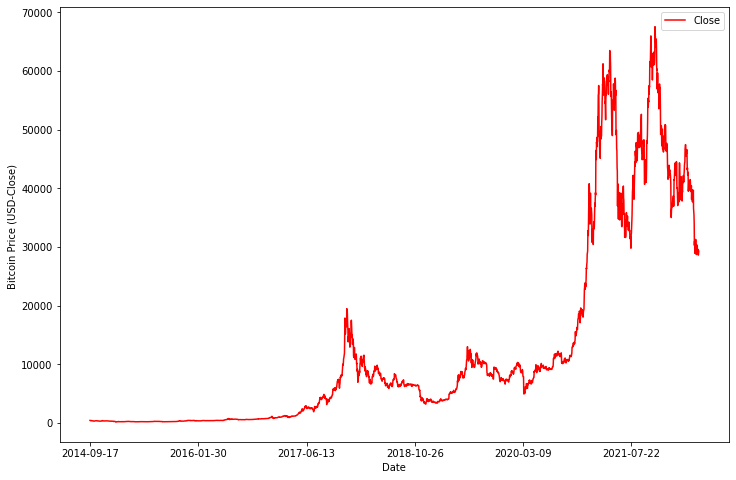

In [10]:
ax=bitcoin_data.plot(x='Date',y='Close',figsize=(12,8),color='r')
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price (USD-Close) ')

Text(0, 0.5, 'Bitcoin Price (USD-Open) ')

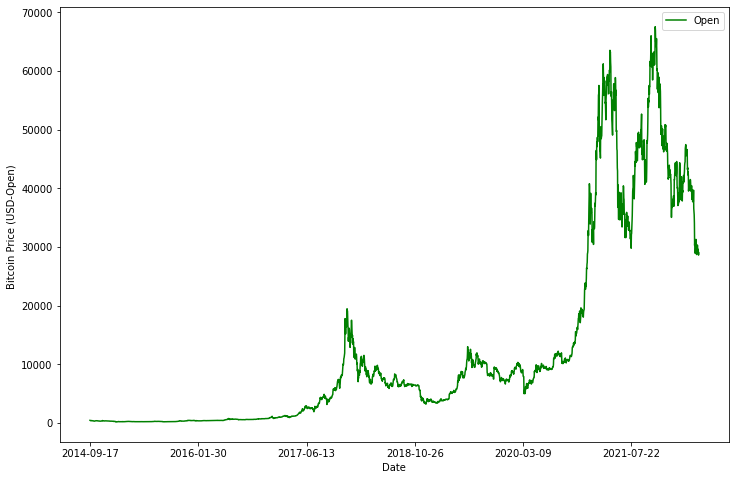

In [11]:
ax=bitcoin_data.plot(x='Date',y='Open',figsize=(12,8),color='g')
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price (USD-Open) ')

In [12]:
# Printing the start date and End date of the dataset

sd=bitcoin_data.iloc[0][0]
ed=bitcoin_data.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2022-05-29


In [13]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], format='%Y-%m-%d')

y_overall = bitcoin_data.loc[(bitcoin_data['Date'] >= '2014-09-17')
                     & (bitcoin_data['Date'] <= '2022-05-29')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
2807,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328
2808,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391


In [14]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,12855.131425,12828.374881
February,13793.306352,13869.217293
March,14790.177346,14833.352724
April,15132.974493,15119.381881
May,13174.146975,13069.735018
June,9299.305977,9294.420703
July,9285.402500,9330.128271
August,11312.971706,11345.157739
September,10489.365578,10462.378150


In [16]:
names = cycle(['Close Price',' Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[ y_overall['Close'], 
                                           y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [17]:
names = cycle(['Open Price',' High Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[ y_overall['Open'], 
                                           y_overall['High']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
names = cycle(['Open Price','Close Price',' High Price',' Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [18]:
data_training=bitcoin_data[bitcoin_data['Date']<'2021-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


In [19]:
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [20]:
data_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
2297,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848


In [21]:
data_test=bitcoin_data[bitcoin_data['Date']>'2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811
...,...,...,...,...,...,...,...
2807,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2808,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634


In [22]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811


In [23]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2807,2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2808,2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2811,2022-05-29,29003.417969,29399.841797,28847.578125,29324.789063,29324.789063,18044510208


In [24]:
training_data=data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


Data Normalization

In [19]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.00809442e-02, 8.83276681e-03, 1.00216614e-02, 9.68757707e-03,
        2.04208427e-04],
       [9.76682835e-03, 8.44307339e-03, 8.61897442e-03, 8.54635971e-03,
        3.85277136e-04],
       [8.62406341e-03, 7.44335417e-03, 7.59965585e-03, 7.51789714e-03,
        4.31621846e-04],
       ...,
       [9.38608635e-01, 9.35447703e-01, 9.20989823e-01, 9.43127084e-01,
        6.10377732e-01],
       [9.48316726e-01, 9.89421170e-01, 9.69964757e-01, 9.94422366e-01,
        6.91583750e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        6.30458660e-01]])

In [20]:
X_train = []
Y_train = []

In [21]:
training_data.shape[0]

2298

In [22]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [23]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [24]:
X_train.shape

(2238, 60, 5)

In [25]:
import tensorflow as tf
from keras.models import Sequential

from keras.layers import Dense, LSTM, Dropout

In [26]:
model = Sequential()
model.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units =1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            24832     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
history= model.fit(X_train, Y_train, epochs = 50, batch_size =64, validation_split=0.1)


Epoch 1/50
32/32 [==============================] - 25s 474ms/step - loss: 0.0102 - val_loss: 0.0070
Epoch 2/50
32/32 [==============================] - 9s 265ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 3/50
32/32 [==============================] - 8s 235ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 4/50
32/32 [==============================] - 8s 236ms/step - loss: 0.0018 - val_loss: 0.0136
Epoch 5/50
32/32 [==============================] - 7s 231ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 6/50
32/32 [==============================] - 7s 232ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 7/50
32/32 [==============================] - 7s 232ms/step - loss: 0.0015 - val_loss: 0.0168
Epoch 8/50
32/32 [==============================] - 7s 231ms/step - loss: 0.0014 - val_loss: 0.0074
Epoch 9/50
32/32 [==============================] - 7s 230ms/step - loss: 0.0012 - val_loss: 0.0082
Epoch 10/50
32/32 [==============================] - 7s 230ms/step - loss: 0.0012 - val_loss: 0.004

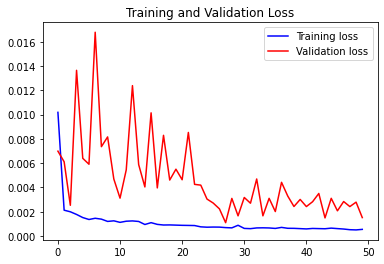

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

TEST

In [31]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,13737.032227,13808.323242,13243.160156,13550.489258,30771455468
1,13550.451172,13984.981445,13325.441406,13950.300781,29869951617
2,13950.488281,14218.766602,13580.471680,14133.707031,35116364962
3,14133.733398,15706.404297,14102.088867,15579.848633,40856321439
4,15579.729492,15903.437500,15226.839844,15565.880859,39837841971


In [32]:
inputs = scaler.transform(df)
inputs

array([[0.4730608 , 0.46831274, 0.46633697, 0.46393851, 0.41490472],
       [0.46655171, 0.47439745, 0.46927239, 0.47780948, 0.40274702],
       [0.48050746, 0.4824498 , 0.47837071, 0.48417253, 0.47350026],
       ...,
       [1.01428819, 1.00351551, 1.00444591, 0.98701945, 0.49326592],
       [0.99236171, 0.98519015, 1.01257824, 0.9935185 , 0.478938  ],
       [1.0056461 , 1.00533751, 1.02303157, 1.01120846, 0.24326887]])

In [33]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [34]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((513, 60, 5), (513,))

In [35]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

(array([[0.8762257 ],
        [0.9223674 ],
        [0.9874558 ],
        [0.9959343 ],
        [0.98976874],
        [1.0307323 ],
        [1.1174638 ],
        [1.1871779 ],
        [1.200482  ],
        [1.1771411 ],
        [1.135895  ],
        [1.1242551 ],
        [1.1342698 ],
        [1.172748  ],
        [1.1980058 ],
        [1.1989876 ],
        [1.1886038 ],
        [1.186175  ],
        [1.1926955 ],
        [1.1886108 ],
        [1.157565  ],
        [1.1243378 ],
        [1.1137859 ],
        [1.1058577 ],
        [1.1050024 ],
        [1.0996073 ],
        [1.0847795 ],
        [1.0807166 ],
        [1.1101148 ],
        [1.1288241 ],
        [1.1271871 ],
        [1.122556  ],
        [1.1315161 ],
        [1.160208  ],
        [1.1922379 ],
        [1.2095447 ],
        [1.2386316 ],
        [1.2508601 ],
        [1.3138267 ],
        [1.4141239 ],
        [1.4356397 ],
        [1.4487176 ],
        [1.4871619 ],
        [1.5076615 ],
        [1.5371926 ],
        [1

In [36]:
scaler.scale_


array([3.48861420e-05, 3.44433911e-05, 3.56754476e-05, 3.46937713e-05,
       1.34860207e-11])

In [37]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [38]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [39]:
Y_pred


array([[16910.195],
       [17800.68 ],
       [19056.814],
       [19220.441],
       [19101.453],
       [19892.004],
       [21565.828],
       [22911.232],
       [23167.988],
       [22717.533],
       [21921.53 ],
       [21696.89 ],
       [21890.164],
       [22632.75 ],
       [23120.2  ],
       [23139.146],
       [22938.75 ],
       [22891.877],
       [23017.717],
       [22938.887],
       [22339.736],
       [21698.488],
       [21494.848],
       [21341.842],
       [21325.336],
       [21221.217],
       [20935.057],
       [20856.646],
       [21424.   ],
       [21785.068],
       [21753.477],
       [21664.1  ],
       [21837.021],
       [22390.742],
       [23008.885],
       [23342.887],
       [23904.232],
       [24140.229],
       [25355.416],
       [27291.041],
       [27706.273],
       [27958.662],
       [28700.594],
       [29096.215],
       [29666.133],
       [30082.752],
       [30603.582],
       [31580.328],
       [32225.217],
       [33125.582],


In [40]:
Y_test


array([19659.01997405, 21512.48502763, 21971.34226144, 21409.90164041,
       22781.05303706, 24679.83456394, 26395.23835738, 27342.43706686,
       26982.62989827, 25698.25201246, 23792.79833136, 22714.74176391,
       25010.56513066, 26243.71444105, 24671.60285626, 24228.59494807,
       23978.53774939, 24550.80977305, 24152.15578027, 23815.04235292,
       20629.30823012, 22089.03464679, 21468.70180874, 21617.77725201,
       21666.8006236 , 21805.09989345, 20375.76767843, 22986.43809725,
       22971.12922445, 22954.26079752, 22175.76476374, 22457.60740078,
       23789.06907867, 25111.55214562, 24745.59355032, 25558.11573088,
       26306.65413317, 26062.01460881, 30975.60791457, 31167.33307299,
       30109.60067155, 32114.80003588, 31855.03310432, 31601.41759946,
       32666.54012823, 32160.19277723, 33010.40460897, 34985.55692423,
       34672.4942858 , 37507.84956995, 37629.8655738 , 38615.64022361,
       36375.14550682, 32759.82142323, 33348.25178938, 31645.82411365,
      

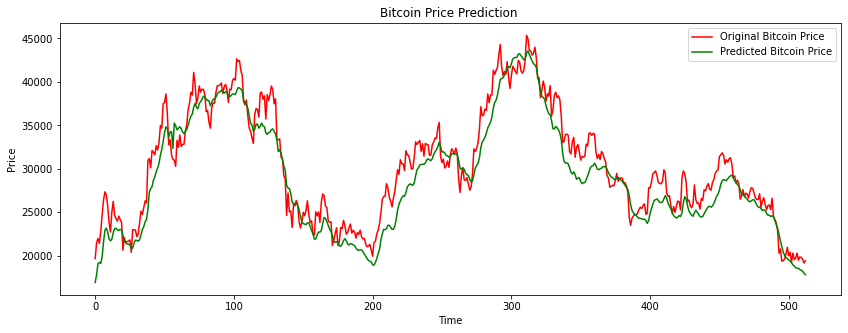

In [43]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Original Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()